# Ensemble Models

One of the latest trends in artificial intelligence modelling can be summarised as "knowledge of the whole or the crowd". What this somewhat familiar phrase defines is the use of a multitude of so-called "weak" models in a meta-classifier. The aim is to generate a "strong" model based on the knowledge extracted by the "weak" models. For example, although it will be detailed later, multiple, much simpler Decision Trees are developed in a Random Forest. The combination of these ones in the Random Forest exceeds the performance of any of the individual models. The models that emerge in this way, as meta-classifiers or meta-regressors, are generically called **Ensemble models**.

Is is worth mentioned that these models may not be limited only to decision trees, but may instead be composed of any type of machine learning model that has been seen previously. They can even be mixed models where not all models have been obtained in the same way, but can be created through the combined use of several techniques such as K-NN, SVM, etc. Thus, the first criteria to classifify the ensemble models would be if they are homogeneous or heterogeneous models. However this is not the only criteria to classifity the ensemble models, in this unit, we will explore various ways of generating the models and how to combine them later on. We will also take a closer look at two of the most common techniques within ensemble models such as Random Forest and _XGBoost_.

First of all, ensure that the required packages are installed. Therefore, you should only execute the folowing cell the fist time.

In [116]:
using Pkg
# Ensure required packages (uncomment to install if needed)
Pkg.add([
    "MLJ", 
    "MLJBase", 
    "MLJModels", 
    "MLJEnsembles", 
    "MLJLinearModels", 
    "DecisionTree", 
    "MLJDecisionTreeInterface", 
    "NaiveBayes", 
    "EvoTrees", 
    "CategoricalArrays", 
    "Random",
    "LIBSVM",           
    "Plots",            
    "MLJModelInterface", 
    "CSV",              
    "DataFrames",       
    "UrlDownload",      
    "XGBoost"    
])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


## Data Preparation

Unlike the first tutorials, where the iris flower problem has been used as a benchmark, in this tutorial we will use a different one. The problem is also included in the UCI repository, although it is also small, the number of variables increases significantly and therefore it will give us some more room to explore. Specifically, it is a classic machine learning problem, which is informally called Rock or Mine? It is a small database consisting of 111 patterns corresponding to rocks and 97 to water mines (simulated as metal cylinders). Each of the patterns consists of 60 numerical measurements corresponding to a section of the sonar sequences. These values are already between 0.0 and 1.0, although it is worth normalising them to be on the safe side. These measurements represent the energy value of different wavelength ranges for a certain period of time.

We are going to use a couple of new packages in the process, more specificly, [DataFrames.jl](https://juliaai.github.io/DataScienceTutorials.jl/data/dataframe/) and [UrlDownload.jl](https://github.com/Arkoniak/UrlDownload.jl). Therefore, first thing first, ensure that the packages are correcly installed.

In [117]:
using Pkg;
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("UrlDownload")
include("utils.jl")
using .Utils

using MLJ
using MLJBase: accuracy
import Pkg;
Pkg.add("MLJNaiveBayesInterface")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


After that, the data will be downloaded if they are not already available, for which the following code can be used:

In [118]:
using UrlDownload
using DataFrames
using CSV
using CategoricalArrays

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urldownload(url, true, format=:CSV, header=false) |> DataFrame
describe(data)

Progress:   0%|                                         |  ETA: 1278824033.21 days

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,0.0291639,0.0015,0.0228,0.1371,0,Float64
2,Column2,0.0384365,0.0006,0.0308,0.2339,0,Float64
3,Column3,0.0438322,0.0015,0.0343,0.3059,0,Float64
4,Column4,0.0538923,0.0058,0.04405,0.4264,0,Float64
5,Column5,0.0752024,0.0067,0.0625,0.401,0,Float64
6,Column6,0.10457,0.0102,0.09215,0.3823,0,Float64
7,Column7,0.121747,0.0033,0.10695,0.3729,0,Float64
8,Column8,0.134799,0.0055,0.1121,0.459,0,Float64
9,Column9,0.178003,0.0075,0.15225,0.6828,0,Float64


As it can be seen in the previos line, we have downloaded de data and pipe it, with the operator `|>`, into the function DataFrame. This is going to create an structure simular to a database table which is particular convinient to check for missing values or the ranges of the different variables. In fact, the library makes it particularly easy to deal with missing values with functions to fullfill or remove the samples with non-valid measures. However it is too long to see every single variable on the output report, if some queries are made we can identify  that here is no missing values. Additionally no variable is over 1.0 but some of them are not normalized. A similar structure can be found in other languages, like R or Python.

As an example, of this process lets make the an additional column in order to convert to categorical the las column 60 which has a **M** for each Mine and an **R** for each sample of rock.

In [119]:
insertcols!(data, :Mine => data[:, 61].=="M")

Row,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58,Column59,Column60,Column61,Mine
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String1,Bool
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R,false
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.325,0.32,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.184,0.197,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.053,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R,false
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,0.6333,0.706,0.5544,0.532,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.507,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.013,0.0106,0.0033,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,R,false
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.406,0.3973,0.2741,0.369,0.5556,0.4846,0.314,0.5334,0.5256,0.252,0.209,0.3559,0.626,0.734,0.612,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.321,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,R,false
5,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.573,0.5399,0.3161,0.2285,0.6995,1.0,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.243,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.023,0.0046,0.0156,0.0031,0.0054,0.0105,0.011,0.0015,0.0072,0.0048,0.0107,0.0094,R,false
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.099,0.1201,0.1833,0.2105,0.3039,0.2988,0.425,0.6343,0.8198,1.0,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.589,0.2872,0.2043,0.5782,0.5389,0.375,0.3411,0.5067,0.558,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.265,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R,false
7,0.0317,0.0956,0.1321,0.1408,0.1674,0.171,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.544,0.515,0.4262,0.2024,0.4233,0.7723,0.9735,0.939,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.007,0.0138,0.0092,0.0143,0.0036,0.0103,R,false
8,0.0519,

Once the data is loaded in the DataFrame for the checking proposes and that any posible process has been applied on the data. As in previous tutorials, the data has to be put on a Matrix form, such as: 

In [120]:
input_data = Matrix(data[!, 1:60]);
output_data = data[!, :Mine];

@assert input_data isa Matrix
@assert output_data isa BitVector

It is worth to mention that in a DataFrame when a set of lines is queried such as in the case of the `X`, the results is also a DataFrame. Therefore, in order to applied the remaining operations it is needed to applied the `Matrix` function to retrive a matrix where the previous operations can be used as usual.

### Question 7.1

> ❓ Now, the data is loaded and converted to the usual types. Now you should be able to apply in the next section and make asplit of the dataset in two subset, test and training, and apply the corresponding normalization. Put the code on the following section to perform both operations. *Tip: Due to the preparation for MLJ models, read the notes at the end of the document*

In [121]:
train_idx, test_idx = Utils.holdOut(size(input_data, 1), 0.1)

train_input = input_data[train_idx, :]
test_input  = input_data[test_idx, :]

train_output = categorical(output_data[train_idx])
test_output  = categorical(output_data[test_idx])

μ = mean(train_input, dims=1) 
σ = std(train_input, dims=1)

σ[σ .== 0] .= 1.0

train_input_standardized = (train_input .- μ) ./ σ
test_input_standardized  = (test_input  .- μ) ./ σ

train_input = MLJ.table(train_input_standardized)
test_input  = MLJ.table(test_input_standardized)

Tables.MatrixTable{Matrix{Float64}} with 21 rows, 60 columns, and schema:
 :x1   Float64
 :x2   Float64
 :x3   Float64
 :x4   Float64
 :x5   Float64
 :x6   Float64
 :x7   Float64
 :x8   Float64
 :x9   Float64
 :x10  Float64
 :x11  Float64
 :x12  Float64
 :x13  Float64
 ⋮     
 :x49  Float64
 :x50  Float64
 :x51  Float64
 :x52  Float64
 :x53  Float64
 :x54  Float64
 :x55  Float64
 :x56  Float64
 :x57  Float64
 :x58  Float64
 :x59  Float64
 :x60  Float64

## Baseline

As mentioned above, ensembles are a set of "weaker" classifiers that allow us to later overcome their limits by joining them together. That is why, before starting with ensembles, it will be necessary to have some reference models that will later be joined together in a meta-classifier. In the following example, some simple models, imlemented with `MLJ` library, are trained: an SVM with RBF kernel, a Linear Regression, a Naïve Bayes and a Decision Tree.

In [122]:
# Load models (MLJ will prompt to add missing packages the first time you run these)
SVC = @load ProbabilisticSVC pkg=LIBSVM
LogisticClassifier = @load LogisticClassifier pkg=MLJLinearModels
DecisionTreeClassifier = @load DecisionTreeClassifier pkg=DecisionTree
# GaussianNBClassifier = @load GaussianNBClassifier pkg=NaiveBayes

#Define the models to train
models = Dict(
    "SVM" => SVC(),
    "LR"  => LogisticClassifier(),
    "DT"  => DecisionTreeClassifier(max_depth=4),
    # "NB"  => GaussianNBClassifier(),
)

base_models=  [ model for (name, model) in models]

machines = Dict()

import MLJLIBSVMInterface ✔
import MLJLinearModels ✔
import MLJDecisionTreeInterface ✔


[ Info: For silent loading, specify `verbosity=0`. 
[ Info: For silent loading, specify `verbosity=0`. 
[ Info: For silent loading, specify `verbosity=0`. 


Dict{Any, Any}()

In [123]:
# Perform the training for each model and calculate the test values (accuracy)
for (name, model) in models
    machines[name] = machine(model, train_input, train_output) |> fit!
    acc = MLJ.accuracy(predict_mode(machines[name], test_input), test_output)
    println("$name: $(acc*100) %")
end

SVM: 90.47619047619048 %
LR: 95.23809523809523 %
DT: 76.19047619047619 %


[ Info: Training machine(ProbabilisticSVC(kernel = RadialBasis, …), …).
[ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
└   lbfgs_options: @NamedTuple{} NamedTuple()
[ Info: Training machine(DecisionTreeClassifier(max_depth = 4, …), …).


## Combining weak models in an ensemble

When it comes to combining the models, there are different strategies depending on the task of the model, i.e. whether we are classifying or regressing. In this particular case we are going to focus on classification, although for regression it would be similar, but the continuous nature of the values should be taken into account when combining the outputs.

Regarding the combination of the classification, there are mainly two ways to combine the outputs of several classifiers. These combinations are called Majority voting and Weighted majority voting, also known as Soft Voting.



In [124]:
using MLJ
using MLJBase
using MLJModelInterface

# ===================================================
# DEFINITION OF VOTINGCLASSIFIER COMPATIBLE WITH MLJ
# ===================================================

"""
    VotingClassifier <: Probabilistic

An ensemble classifier that combines predictions from multiple base models using voting strategies.

# Fields
- `models::Vector{Probabilistic}`: Vector of base probabilistic models to be combined
- `voting::Symbol`: Voting strategy, either `:hard` (majority vote) or `:soft` (averaged probabilities)
- `weights::Union{Nothing, Vector{Float64}}`: Optional weights for each model. If `nothing`, all models have equal weight. Weights are automatically normalized to sum to 1.0.

# Examples
```julia
# Equal weights (default)
voting_clf = VotingClassifier(
    models=[LogisticClassifier(), DecisionTreeClassifier()],
    voting=:soft
)

# Custom weights (will be normalized automatically)
voting_clf = VotingClassifier(
    models=[LogisticClassifier(), DecisionTreeClassifier(), RandomForestClassifier()],
    voting=:hard,
    weights=[5, 3, 2]  # Will be normalized to [0.5, 0.3, 0.2]
)
```
"""
mutable struct VotingClassifier <: Probabilistic   # Models must be probabilistic, inherited from MLJBase
    models::Vector{Probabilistic}
    voting::Symbol  # :hard or :soft
    weights::Union{Nothing, Vector{Float64}}
end

"""
    VotingClassifier(; models=Probabilistic[], voting=:hard, weights=nothing)

Constructor for VotingClassifier.

# Arguments
- `models::Vector{Probabilistic}=Probabilistic[]`: Base models to combine
- `voting::Symbol=:hard`: Voting strategy (`:hard` or `:soft`)
- `weights::Union{Nothing, Vector{<:Real}}=nothing`: Weights for each model. Automatically normalized to sum to 1.0.

# Throws
- `AssertionError`: If voting is not `:hard` or `:soft`
- `AssertionError`: If weights length doesn't match models length
- `AssertionError`: If all weights are zero or negative
"""
function VotingClassifier(; models=Probabilistic[], voting=:hard, weights=nothing)
    @assert voting in [:hard, :soft] "The only possible labels are :hard or :soft"
    
    normalized_weights = nothing
    if weights !== nothing
        @assert length(weights) == length(models) "Number of weights must match number of models"
        @assert all(w >= 0 for w in weights) "All weights must be non-negative"
        
        # Normalize weights to sum to 1.0
        normalized_weights = Float64.(weights) ./ sum(weights)
    end
    
    return VotingClassifier(models, voting, normalized_weights)
end

"""
    MLJModelInterface.fit(model::VotingClassifier, verbosity::Int, X, y)

Fit the VotingClassifier by training each base model on the provided data.

# Arguments
- `model::VotingClassifier`: The voting classifier instance
- `verbosity::Int`: Verbosity level for training output
- `X`: Training features (table format)
- `y`: Training target (categorical vector)

# Returns
- `fitresults`: Vector of trained machines (one per base model)
- `cache`: Nothing (no caching implemented)
- `report`: Named tuple with training information (number of models, voting strategy, and normalized weights)
"""
function MLJModelInterface.fit(model::VotingClassifier, verbosity::Int, X, y)
    # Train each base model
    fitresults = []
    for base_model in model.models
        model_copy = deepcopy(base_model)
        mach = machine(model_copy, X, y)
        fit!(mach, verbosity=0)
        push!(fitresults, mach)
    end
    
    # Save necessary information
    cache = nothing
    report = (n_models=length(model.models), voting=model.voting, weights=model.weights)
    
    return fitresults, cache, report
end

"""
    MLJModelInterface.predict_mode(model::VotingClassifier, fitresult, Xnew)

Predict class labels using hard voting (majority vote with optional weights).

# Arguments
- `model::VotingClassifier`: The voting classifier instance
- `fitresult`: Vector of trained machines from fit
- `Xnew`: New data to predict on

# Returns
- Categorical vector of predicted class labels based on (weighted) majority voting

# Details
Each base model votes for a class. If weights are provided, each vote is multiplied by its 
corresponding weight. The class with the highest (weighted) vote count is selected.
"""
function MLJModelInterface.predict_mode(model::VotingClassifier, fitresult, Xnew)
    machines = fitresult
    
    # Get predictions from all models
    predictions = [predict_mode(mach, Xnew) for mach in machines]
    
    # Get all unique classes
    # all_classes = unique(vcat([unique(p) for p in predictions]...))
    all_classes = MLJBase.classes(predictions[1])
    n_samples = length(predictions[1])
    n_models = length(machines)
    
    # Determine weights (equal if not specified)
    weights = model.weights === nothing ? fill(1.0/n_models, n_models) : model.weights
    
    # Weighted voting
    ensemble_pred = Vector{eltype(predictions[1])}(undef, n_samples)
    
    for i in 1:n_samples
        # Count weighted votes for each class
        vote_counts = Dict{eltype(predictions[1]), Float64}()
        for class in all_classes
            vote_counts[class] = 0.0
        end
        
        for (j, pred) in enumerate(predictions)
            vote_counts[pred[i]] += weights[j]
        end
        
        # Select class with maximum weighted votes
        ensemble_pred[i] = argmax(vote_counts)
    end
    
    # return categorical(ensemble_pred)
    return categorical(MLJBase.unwrap.(ensemble_pred))
end

"""
    MLJModelInterface.predict(model::VotingClassifier, fitresult, Xnew)

Predict class probabilities using the specified voting strategy.

# Arguments
- `model::VotingClassifier`: The voting classifier instance
- `fitresult`: Vector of trained machines from fit
- `Xnew`: New data to predict on

# Returns
- Vector of `UnivariateFinite` distributions representing class probabilities

# Details
- For `:hard` voting: Returns deterministic predictions wrapped in UnivariateFinite (with optional weights)
- For `:soft` voting: Averages probability distributions from all base models using weights
"""
function MLJModelInterface.predict(model::VotingClassifier, fitresult, Xnew)
    machines = fitresult
    
    result = if model.voting == :hard
        # For hard voting, return deterministic predictions
        UnivariateFinite(predict_mode(model, fitresult, Xnew))
    else
        # Soft voting: weighted average of probabilities
        all_predictions = [predict(mach, Xnew) for mach in machines]
        
        # Get class levels
        first_pred = all_predictions[1][1]
        class_levels = MLJBase.classes(first_pred)
        n_classes = length(class_levels)
        n_samples = length(all_predictions[1])
        n_models = length(machines)
        
        # Determine weights (equal if not specified)
        weights = model.weights === nothing ? fill(1.0/n_models, n_models) : model.weights
        
        # Weighted average of probabilities
        avg_probs = zeros(n_samples, n_classes)
        for (model_idx, preds) in enumerate(all_predictions)
            for i in 1:n_samples
                for (j, level) in enumerate(class_levels)
                    avg_probs[i, j] += weights[model_idx] * pdf(preds[i], level)
                end
            end
        end
        
        # Create UnivariateFinite distributions with weighted averaged probabilities
        [UnivariateFinite(class_levels, avg_probs[i, :]) for i in 1:n_samples]
    end
    
    return result
end

"""
Model metadata registration for VotingClassifier.

Specifies input/output types and capabilities for MLJ integration.
"""
MLJModelInterface.metadata_model(VotingClassifier,
    input_scitype=Table(Continuous),
    target_scitype=AbstractVector{<:Finite},
    supports_weights=false,
    load_path="VotingClassifier"
)

MLJModelInterface.metadata_model

## Majority Voting
Although also known as Hard Voting, as the name suggests, they are based on selecting the most voted option among the predicted ones among the different models. Each model casts a deterministic vote or prediction. The final class or prediction is the one that receives the most votes or the average among the results. It’s equivalent to a “democratic election” where each model/expert has one vote, and the most-voted option wins. In this way, the problem could be solved taking into account different results or points of view on the problem. 

### Example

With 3 classifiers predicting a pattern:

* SVM predicts: **Mine**

* Logistic Regression predicts: **Rock**

* Naive Bayes predicts: **Rock**

**Result:** Rock (2 votes vs 1 vote) ✓

See an example in the code below of constructing such a model.

In [125]:
# Load models (MLJ will prompt to add missing packages the first time you run these)
SVC = @load ProbabilisticSVC pkg=LIBSVM
LogisticClassifier = @load LogisticClassifier pkg=MLJLinearModels
# GaussianNBClassifier = @load GaussianNBClassifier pkg=NaiveBayes

#Define the models to train
models = Dict(
    "SVM" => SVC(),
    "LR"  => LogisticClassifier(),
    # "NB"  => GaussianNBClassifier(),
)
base_models = Probabilistic[model for (name, model) in models]

machines = Dict()

import MLJLIBSVMInterface ✔
import MLJLinearModels ✔


[ Info: For silent loading, specify `verbosity=0`. 
[ Info: For silent loading, specify `verbosity=0`. 


Dict{Any, Any}()

In [126]:
# Perform the training for each model and calculate the test values (accuracy)
for (name, model) in models
    machines[name] = machine(model, train_input, train_output) |> fit!
    acc = MLJ.accuracy(predict_mode(machines[name], test_input), test_output)
    println("$name: $(acc*100) %")
end

SVM: 85.71428571428571 %
LR: 95.23809523809523 %


[ Info: Training machine(ProbabilisticSVC(kernel = RadialBasis, …), …).
[ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
└   lbfgs_options: @NamedTuple{} NamedTuple()


In [127]:
#Define the metaclassifier based on the base_models
models["Ensemble (Hard Voting)"] = VotingClassifier(models = base_models, voting=:hard)
machines["Ensemble (Hard Voting)"] = machine(models["Ensemble (Hard Voting)"], train_input, train_output) |> fit!

for (name, machine) in machines
    acc = MLJ.accuracy(predict_mode(machine, test_input), test_output)
    println("$name: $(acc*100) %")
end

[ Info: Training machine(VotingClassifier(models = Probabilistic[ProbabilisticSVC(kernel = RadialBasis, …), LogisticClassifier(lambda = 2.220446049250313e-16, …)], …), …).


SVM: 85.71428571428571 %
LR: 95.23809523809523 %
Ensemble (Hard Voting): 95.23809523809523 %


The main problem is that we rely equally on all models when deciding on the response class.

## Soft Voting (Weighted Probability Voting)

As mentioned in the previous section, one of the problems of the classical *emsemble* model is that all outcomes are weighted equally and in each of the "weak" models only the most voted option is taken into account. To solve this, **Soft Voting** propsose the use of the **probabilities** that each classifier assigns to each class, instead of just the predicted class. The final result is obtained by averaging these probabilities and selecting the class with the highest average probability.

### Example without weights (all models equally important)

| Classifier    | P(Mine) | P(Rock) |
|--------------|---------|---------|
| SVM          | 0.9     | 0.1     |
| LR           | 0.3     | 0.7     |
| NB           | 0.2     | 0.8     |
| **Average ** | **0.47**| **0.53**|

**Calculation:**
- P(Mine) = (0.9 + 0.3 + 0.2) / 3 = 0.47
- P(Rock) = (0.1 + 0.7 + 0.8) / 3 = 0.53

**Result** Rock (highest average probability) ✓

**Advantage over Hard Voting:** Even though SVM is very confident about Mine (0.9), the other two models are quite confident about Rock (0.7 and 0.8). Soft Voting captures this confidence information.

In [128]:
#Define the metaclassifier based on the base_models
models["Ensemble (Soft Voting - Equal)"] = VotingClassifier( models = base_models, voting = :soft, weights = nothing) # All models equally weighted
machines["Ensemble (Soft Voting - Equal)"] = machine(models["Ensemble (Soft Voting - Equal)"], train_input, train_output) |> fit!
for (name, machine) in machines
    acc = MLJ.accuracy(predict_mode(machine, test_input), test_output)
    println("$name: $(acc*100) %")
end

SVM: 85.71428571428571 %
LR: 95.23809523809523 %
Ensemble (Hard Voting): 95.23809523809523 %
Ensemble (Soft Voting - Equal): 95.23809523809523 %


[ Info: Training machine(VotingClassifier(models = Probabilistic[ProbabilisticSVC(kernel = RadialBasis, …), LogisticClassifier(lambda = 2.220446049250313e-16, …)], …), …).


#### Weigthed Soft Voting 
Although it could improve because the confidence is taken into account, the main issue is the equality among the models. To solve this, one of the proposals is the use of a weighting in the decision.In many cases, we know that some models perform better than others. For example, if the SVM has an accuracy of 85% and the others are around 70%, we should give more importance to the SVM. This is achieved through weights. In the soft voting, the weights multiply each model’s probabilities before averaging them. Mathematically: 

$$P(clase) = \frac{\sum_{i=1}^{n} w_i \cdot P_i(clase)}{\sum_{i=1}^{n} w_i}$$

Where:

* $w_i$ = weight of model $i$

* $P_i(class)$ = probability assigned by model $i$ to that class

* $n$ = number of models

Going along with the same example, imagine that we want to increase the importance of the SVM
### Example with weights [2, 1, 1] (double weight for SVM)

| Classifier   | Weight | P(Mine) | P(Rock)| Mine Contribution | Rock Contribution |
|--------------|-------|---------|---------|-------------------|-------------------|
| SVM          | 2     | 0.9     | 0.1     | 2 × 0.9 = 1.8     | 2 × 0.1 = 0.2     |
| LR           | 1     | 0.3     | 0.7     | 1 × 0.3 = 0.3     | 1 × 0.7 = 0.7     |
| NB           | 1     | 0.2     | 0.8     | 1 × 0.2 = 0.2     | 1 × 0.8 = 0.8     |
| **Sum**      | 4     |         |         | **2.3**           | **1.7**           |
| **Weighted Avg.** |  |         |         | **0.575**         | **0.425** |

**Calculation:**
- P(Mine) = (1.8 + 0.3 + 0.2) / 4 = 2.3 / 4 = 0.575
- P(Rock) = (0.2 + 0.7 + 0.8) / 4 = 1.7 / 4 = 0.425

**Result:** Mine (highest weighted probabilit) ✓

In [129]:
models["Ensemble (Soft Voting - Weighted)"] = VotingClassifier(models = base_models, voting=:soft,weights=[1,2])
machines["Ensembles (Soft Voting - Weighted)"] = machine(models["Ensemble (Soft Voting - Weighted)"],train_input, train_output) |> fit!

for (name, machine) in machines
    acc = MLJ.accuracy(predict_mode(machine, test_input), test_output)
    println("$name: $(acc*100) %")
end

SVM: 85.71428571428571 %
LR: 95.23809523809523 %
Ensembles (Soft Voting - Weighted): 95.23809523809523 %
Ensemble (Hard Voting): 95.23809523809523 %
Ensemble (Soft Voting - Equal): 95.23809523809523 %


[ Info: Training machine(VotingClassifier(models = Probabilistic[ProbabilisticSVC(kernel = RadialBasis, …), LogisticClassifier(lambda = 2.220446049250313e-16, …)], …), …).


## When to Use Each Strategy
### Hard Voting

- Models that only output categorical predictions (no probabilities)

- When all models are equally reliable

- Simpler and faster

### Soft Voting (no weights)

- Models that output probabilities

- When all models perform similarly

- Captures confidence in each prediction

### Weighted Soft Voting

- When some models are clearly better

- When you want to give more importance to specific models

- Weights can be based on:

    - Validation accuracy
    - Known model expertise
    - F1-score or another relevant metric

In order to chose the weights there are several strategies being the most importan: 

    1. Manual (based on prior knowledge)
    2. Based on validation accuracy
    3. Optimization via grid search

### Question 7.2
> ❓ We have perform every single test with a hold-out strategy, however, as it was appointed in a previous session, the application of a cross-validation approach is prefered to cut the dependency on the selection of the samples. In this case you could think that there are two different approaches one is apply the cross-validation to each model, choose the better one and combine those in a single ensemble. The other way arround would be applying the cross-validation at ensemble level before training the models. Which one is correct and why?

It's better to take the whole ensemble as the model, and cross-validate at that level. If we train each model individually we are going to have the best result for each one working alone. But we will have no clue on how that translates into the ensemble. We want to optimize the prediction of the whole system, not on each model individually.

### Stacking

This last approach to combining the models can be considered as a variant of Soft Voting. As mentioned in that section, soft voting allows the weights of each of the models to be fixed and this can be adjusted with a decaying gradient technique. Stacking is usually identified as creating a classification technique superior to a linear regression (which is what Soft Voting does) such as an ANN to combine the models.

Thus, as has been done previously, the outputs of the different techniques could be taken and used as inputs to another classification model, allowing for the adjustment of the weights and the non-linear combinations of the responses of each one.

You can see an example or this in the following code, which uses the implementation on `MLJ` whcih uses an SVC as compbining model:

In [130]:
# Load the base models again to ensure we have a clean set
SVC = @load ProbabilisticSVC pkg=LIBSVM verbosity=0
LogisticClassifier = @load LogisticClassifier pkg=MLJLinearModels verbosity=0
DecisionTreeClassifier = @load DecisionTreeClassifier pkg=DecisionTree verbosity=0
# GaussianNBClassifier = @load GaussianNBClassifier pkg=NaiveBayes verbosity=0

# Create a NamedTuple of the base models for stacking
base_models_for_stack = (;
    :svm => SVC(),
    :lr  => LogisticClassifier(),
    :dt  => DecisionTreeClassifier(max_depth=4),
    # :nb  => GaussianNBClassifier()
)

# Build the staking model
models["Ensemble (Stacking)"] = Stack(; 
    metalearner = SVC(),
    resampling = CV(nfolds=5, shuffle=true, rng=123),
    measures = log_loss,
    base_models_for_stack...  
)

machines["Ensemble (Stacking)"] = machine(models["Ensemble (Stacking)"], train_input, train_output) |> fit!

[ Info: Training machine(ProbabilisticStack(metalearner = ProbabilisticSVC(kernel = RadialBasis, …), …), …).


[ Info: Training machine(:svm, …).
[ Info: Training machine(:lr, …).
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
└   lbfgs_options: @NamedTuple{} NamedTuple()
[ Info: Training machine(:dt, …).
[ Info: Training machine(:svm, …).
[ Info: Training machine(:lr, …).
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
└   lbfgs_options: @NamedTuple{} NamedTuple()
[ Info: Training machine(:dt, …).
[ Info: Training machine(:svm, …).
[ Info: Training machine(:lr, …).
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
└   lbfgs_options: @NamedTuple{} NamedTuple()
[ Info: Training machine(:dt, …).
[ Info: Training machine(:svm, …).
[ Info: Training machine(:lr, …).
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @N

trained Machine; does not cache data
  model: ProbabilisticStack(metalearner = ProbabilisticSVC(kernel = RadialBasis, …), …)
  args: 
    1:	Source @478 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @258 ⏎ AbstractVector{Multiclass{2}}


In [131]:
for (name, machine) in machines
    acc = MLJ.accuracy(predict_mode(machine, test_input), test_output)
    println("$name: $(acc*100) %")
end

SVM: 85.71428571428571 %
LR: 95.23809523809523 %
Ensembles (Soft Voting - Weighted): 95.23809523809523 %
Ensemble (Hard Voting): 95.23809523809523 %
Ensemble (Soft Voting - Equal): 95.23809523809523 %
Ensemble (Stacking): 95.23809523809523 %


## Model creation

One of the key elements that has not yet been addressed is the creation of the models that will compose the meta-classifier. So far, the approach that has been followed is not very adequate as the input dataset for all models is the same. This has the effect of an obvious lack of diversity in the models since whichever model we create, it will have the same information or "point of view" as the others. However, this is not the usual practice. Instead, the set of input patterns is usually divided into smaller sets with which to train one or more techniques in order to reduce the computational cost on the one hand, and to increase the diversity of the models on the other. It is necessary to remember at this point that "weak" models do not have to be perfect in all classes and do not even have to cover all possibilities, only models that are quick to train and offer a more or less consistent output.

As for the way in which to partition the data for the creation of the models, most approaches usually consider two main approaches known as *Bagging* and *Boosting*. In the following, these two approaches will be briefly described.

### Bagging or boostrap aggregation
The technique known as _Bagging_ or selection with replacement was proposed by Breitman in 1996. It is based on the development of multiple models which can be trained in parallel. The key element of these models is that each model is trained on a subset of the training set. This subset of data is drawn randomly with replacement. This last point is particularly important because once an example has been selected from the possibilities, it is placed back among the possibilities so that it can be selected either in the subset being built, or in the subsets of the other models, i.e. non-disjoint sets of examples are created.

![Bagging Example](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/440px-Ensemble_Bagging.svg.png)

The result is that "experts" are created on specialised data and depending on the partition. While common, or more frequent, data is correctly covered by all models, it is also true that less frequent data tends not to be in all partitions and may not be covered in all cases. Thus, you would get models that would be more specialised in certain data or have a different point of view, that would be experts in a particular region of the search space.

Although it will be discussed in more detail later, a well-known technique that uses this approach for the construction of its "weak" models is RandomForest. It builds the decision trees that make up the metaclassifier in this way. Any classifier can be used as the basis of a *Bagging* with the class [EnsembleModel](https://juliaai.github.io/MLJ.jl/stable/models/EnsembleModel_MLJEnsembles/#EnsembleModel_MLJEnsembles). 

For example, in the following code, 10 SVM for classication has been chosen as weak models. Each of those models habe been trained on only 50% of the training patterns, and therefore the variance among them should be increased.
 

In [132]:
# Add a Bagging model using SVC as base model
using MLJEnsembles: EnsembleModel, CPUThreads

models["Bagging (SVC)"] = EnsembleModel(
    model = SVC(),              # or ProbabilisticSVC()
    n = 10,                     # number of base models
    bagging_fraction = 0.50,    # fraction of examples per base model
    rng = 123,                  
    acceleration = CPUThreads() # uses Threads to speed up the training due to the independence of base models
)

machines["Bagging (SVC)"] = machine(models["Bagging (SVC)"], train_input, train_output) |> fit!

for (name, machine) in machines
    acc = MLJ.accuracy(predict_mode(machine, test_input), test_output)
    println("$name: $(acc*100) %")
end

Ensemble-building in parallel on 1 threads.

SVM: 85.71428571428571 %
LR: 95.23809523809523 %
Ensembles (Soft Voting - Weighted): 95.23809523809523 %
Ensemble (Hard Voting): 95.23809523809523 %
Ensemble (Soft Voting - Equal): 95.23809523809523 %
Ensemble (Stacking): 95.23809523809523 %
Bagging (SVC): 71.42857142857143 %


[ Info: Training machine(ProbabilisticEnsembleModel(model = ProbabilisticSVC(kernel = RadialBasis, …), …), …).


As an alternative to extracting complete examples, a vertical partition of the training _dataset_ could be performed, thus extracting features. To implement this alternative, in the `EnsembleModel` function, the parameter *bagging_fraction* must be defined. This approach is used when the number of features is particularly high in order to create simpler models that do not use all the information that is often redundant. It should be noted that this feature extraction procedure for models is done without replacement, i.e. features extracted for one classifier are not re-entered into the list of possibilities until the set for the next classifier is created.

### Boosting

The other major family of techniques for ensemble metamodelling is what is known as *Boosting*. In this case, the approach is slightly different, since the aim is to create a chain of classifiers. The key idea is that every successive classifier becomes **more specialized in the patterns that previous models misclassified**. Therefore, as in the previous case, a subset of patterns is selected from the original set. However, this process is done sequentially and without replacement. This causes the new learners to focus increasingly on the difficult cases, gradually producing a stronger and more accurate composite model. Thus, as in *Bagging*, the underlying idea of this approach is that not all models have to have all patterns as a basis, but unlike _Bagging_, this process is linear because of the dependency in the construction of the models. In the end, the outputs of the individual models are combined through a **weighted majority vote**, where each classifier’s weight reflects its performance during training.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Ensemble_Boosting.svg/1920px-Ensemble_Boosting.svg.png" alt="Boosting examples" width="600"/>

#### AdaBoost

The **AdaBoost** algorithm starts by assigning equal weights to all instances in the training set. A simple classifier (called a *stump*, which is a tree of only one level) is trained, and its performance is evaluated. Instances that are misclassified are given higher weights, so that the next classifier focuses more on those difficult cases.  This iterative process continues, each time updating the weights and creating a new weak learner that complements the previous ones. In AdaBoost, the weighting of both instances and classifiers is based on an **exponential loss function**, which penalizes misclassifications exponentially. The final ensemble prediction is obtained through a **weighted majority vote** among all weak classifiers. In MLJ, this behaviour is implemented by the `AdaBoostStumpClassifier`, provided by the `DecisionTree.jl` package.


#### Gradient Boosting

**Gradient Boosting** follows a different principle: instead of reweighting instances explicitly, it uses a **gradient descent approach** to minimize a loss function. Each new tree in the sequence is trained to predict the **residual errors** (or gradients) of the previous ensemble, gradually refining the model. In the case of classification, each decision tree models the **logistic likelihood** of the data, and its predictions are combined to estimate the class probabilities. The final decision is based on the sum of these probabilities across all trees. In MLJ, this can be implemented using the `EvoTreeClassifier` (from `EvoTrees.jl`), which is conceptually similar to scikit-learn’s `GradientBoostingClassifier`, but is written entirely in Julia and supports both CPU and GPU acceleration.

In [133]:
using MLJ
using MLJBase: accuracy

# Load model (pure Julia implementations)
AdaBoostStumpClassifier = @load AdaBoostStumpClassifier pkg=DecisionTree
EvoTreeClassifier = @load EvoTreeClassifier pkg=EvoTrees

# AdaBoost (similar to sklearn AdaBoostClassifier with stumps)
models["AdaBoost"] = AdaBoostStumpClassifier(n_iter = 30)
machines["AdaBoost"] = machine(models["AdaBoost"], train_input, train_output) |> fit!


# Gradient Boosting (similar to sklearn GradientBoostingClassifier)
models["EvoTrees"] = EvoTreeClassifier(
    nrounds=30,
    eta=1.0,
    max_depth=2,
    loss=:logistic
)

machines["EvoTrees"] = machine(models["EvoTrees"], train_input, train_output) |> fit!


for (name, machine) in machines
    acc = MLJ.accuracy(predict_mode(machine, test_input), test_output)
    println("$name: $(acc*100) %")
end


import MLJDecisionTreeInterface ✔
import EvoTrees ✔
SVM: 85.71428571428571 %


[ Info: For silent loading, specify `verbosity=0`. 
[ Info: For silent loading, specify `verbosity=0`. 
[ Info: Training machine(AdaBoostStumpClassifier(n_iter = 30, …), …).
[ Info: The following kwargs are not supported and will be ignored: [:loss].
┌ Info: Training machine(EvoTrees.EvoTreeClassifier
│  - loss: mlogloss
│  - metric: mlogloss
│  - nrounds: 30
│  - bagging_size: 1
│  - early_stopping_rounds: 9223372036854775807
│  - L2: 1.0
│  - lambda: 0.0
│  - gamma: 0.0
│  - eta: 1.0
│  - max_depth: 2
│  - min_weight: 1.0
│  - rowsample: 1.0
│  - colsample: 1.0
│  - nbins: 64
│  - tree_type: binary
│  - seed: 123
│  - device: cpu
└ , …).


LR: 95.23809523809523 %
Ensembles (Soft Voting - Weighted): 95.23809523809523 %
EvoTrees: 85.71428571428571 %
Ensemble (Hard Voting): 95.23809523809523 %
AdaBoost: 80.95238095238095 %
Ensemble (Soft Voting - Equal): 95.23809523809523 %
Ensemble (Stacking): 95.23809523809523 %
Bagging (SVC): 71.42857142857143 %


### Question 7.3

Develop a function to **train and evaluate a homogeneous ensemble** using **`EnsembleModel`** from **MLJ**, where all base estimators are of the **same type** (e.g., SVC, DecisionTree, etc.).  
The function, named `trainClassEnsemble`, should follow a **stratified cross-validation** scheme and return at least the test metric(s) value.

**Requirements and Steps (summary):**

1. **Results vector:** Create a vector of length *k* to store, for each fold, the test metric(s) values.  
2. **k-fold loop:** For each iteration, and using the provided stratified indices, build the four data partitions:  
   - `X_train`, `y_train`, `X_test`, `y_test`.  
3. **Base model generation:** Instantiate the **base model** (from Unit 6) with its **hyperparameters**.  
4. **Build the homogeneous ensemble:** Wrap the base model inside an `EnsembleModel` (MLJ), configuring the number of models (`n`) and, if applicable, bagging parameters (`bagging_fraction`, `sampling_fraction`, `n_subfeatures`, etc.).  
5. **Training:** Fit the ensemble on the training set (`machine`, `fit!`).  
6. **(Optional) Internal validation:** If a validation set is required (e.g., for early stopping), apply a **hold-out** split on `X_train`, `y_train`.  
7. **Evaluation:** Compute the chosen metric(s) on the test set for the current fold and store the results.  
8. **Aggregation:** Finally, report the **average** and **standard deviation** of each metric across all folds.

> **Important:** You must implement this as a **homogeneous ensemble** (all base learners of the same type) using **`EnsembleModel` from MLJ** (bagging approach). *Stacking* or *boosting* is not required here.
 

In [134]:
function trainClassEnsemble(estimator::Symbol, 
        modelsHyperParameters:: Dict,
        ensembleHyperParameters:: Dict,     
        trainingDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,2}},    
        kFoldIndices::     Array{Int64,1})

    # 1. Unpack dataset and convert One-Hot targets (Y) to 1D vector (y_labels)
    # The signature (Bool,2) implies Y is a one-hot matrix (N x C).
    # MLJ models require a 1D categorical vector.
    X, Y = trainingDataset
    numClasses = size(Y, 2)
    
    @assert numClasses > 1

    # Use 1-based indices (1, 2, ..., C) as the class labels
    classes = 1:numClasses
    
    # Convert NxC one-hot matrix Y to an N-element vector of integer labels
    # findfirst(identity, row) finds the index of the 'true' value in each row
    y_labels = [findfirst(identity, row) for row in eachrow(Y)]

    # 2. Get k (number of folds)
    numFolds = maximum(kFoldIndices)

    # 3. Initialize metric accumulators (one entry per fold)
    acc_f  = zeros(Float64, numFolds)
    err_f  = zeros(Float64, numFolds)
    sens_f = zeros(Float64, numFolds)
    spec_f = zeros(Float64, numFolds)
    ppv_f  = zeros(Float64, numFolds)
    npv_f  = zeros(Float64, numFolds)
    f1_f   = zeros(Float64, numFolds)
    
    # 4. Initialize global confusion matrix accumulator (as Floats for averaging)
    globalCM = zeros(Float64, numClasses, numClasses)

    # 5. k-fold cross-validation loop
    for fold in 1:numFolds
        # 5a. Split data for this fold
        test_mask  = (kFoldIndices .== fold)
        train_mask = .!test_mask

        Xtr, Xte = X[train_mask, :], X[test_mask, :]
        # Use the 1D integer labels for y
        ytr_labels, yte_labels = y_labels[train_mask], y_labels[test_mask]

        # 5b. Instantiate the base model
        local base_model # Ensure model is scoped to the loop
        
        if estimator == :SVC
            Cval   = Float64(get(modelsHyperParameters, :C, 1.0))
            gamma  = Float64(get(modelsHyperParameters, :gamma, 0.0)) # 0.0 -> 1/n_features
            degree = Int32(get(modelsHyperParameters, :degree, 3))
            coef0  = Float64(get(modelsHyperParameters, :coef0, 0.0))
            kern_s = String(get(modelsHyperParameters, :kernel, "rbf"))
            kern   = _get_kernel(kern_s)

            base_model = SVCModel(kernel = kern, cost = Cval, gamma = gamma, degree = degree, coef0 = coef0)

        elseif estimator == :DecisionTreeClassifier
            max_depth = get(modelsHyperParameters, :max_depth, nothing) # `nothing` means no limit
            rng_dt    = get(modelsHyperParameters, :rng, Random.MersenneTwister(1))
            base_model = DecisionTreeClassifier(max_depth = max_depth, rng = rng_dt)

        elseif estimator == :KNeighborsClassifier
            k_neighbors = Int(get(modelsHyperParameters, :n_neighbors, 5))
            base_model = KNNModel(K = k_neighbors)
        
        else
            error("Unknown estimator symbol: $estimator. Expected :SVC, :DecisionTreeClassifier, or :KNeighborsClassifier")
        end

        # 5c. Build the homogeneous ensemble (EnsembleModel)
        n_models = Int(get(ensembleHyperParameters, :n, 10))
        bagging_frac = Float64(get(ensembleHyperParameters, :bagging_fraction, 0.8))
        rng_seed = Int(get(ensembleHyperParameters, :rng, 123))
        
        ensemble_model = EnsembleModel(
            model = base_model,
            n = n_models,
            bagging_fraction = bagging_frac,
            rng = rng_seed,
            acceleration = MLJ.CPUThreads()
        )

        # 5d. Training
        Xtr_table = MLJ.table(Xtr)
        # Convert 1D integer labels (1,2,3) to MLJ Categorical type
        ytr_cat = categorical(ytr_labels, levels=classes) 

        mach = machine(ensemble_model, Xtr_table, ytr_cat)
        fit!(mach, verbosity=0)

        # 5e. Evaluation
        Xte_table = MLJ.table(Xte)
        # EnsembleModel (bagging) is probabilistic
        yhat_prob = predict(mach, Xte_table) 
        # Get the class with the highest probability
        yhat = mode.(yhat_prob) 
        
        # Convert CategoricalValue predictions back to integer labels (1, 2, 3...)
        yhat_labels = Int.(levelcode.(yhat))
        yte_cat = categorical(yte_labels, levels=classes)

        # 5f. Compute metrics using the (Any,1), (Any,1), (Any,1) version from Utils
        (acc, err, sens, spec, ppv, npv, f1, CM) = Utils.confusionMatrix(
            yhat, 
            yte_cat, 
            classes; 
            weighted=true # Or get(ensembleHyperParameters, :weighted_metrics, true)
        )

        # 5g. Store metrics for this fold
        acc_f[fold]  = acc
        err_f[fold]  = err
        sens_f[fold] = sens
        spec_f[fold] = spec
        ppv_f[fold]  = ppv
        npv_f[fold]  = npv
        f1_f[fold]   = f1
        
        # 5h. Accumulate Confusion Matrix (deterministic, so just sum)
        globalCM .+= Float64.(CM)
    end # end k-fold loop

    # 6. Aggregate metrics across all folds
    return (
        (mean(acc_f),  std(acc_f)),
        (mean(err_f),  std(err_f)),
        (mean(sens_f), std(sens_f)),
        (mean(spec_f), std(spec_f)),
        (mean(ppv_f),  std(ppv_f)),
        (mean(npv_f),  std(npv_f)),
        (mean(f1_f),   std(f1_f)),
        globalCM # Return the summed confusion matrix
    )
end

trainClassEnsemble (generic function with 2 methods)

### Question 7.4
> ❓ Repeated the previous function, but this time for a heterogeneous Classifier.

In [135]:
function trainClassEnsemble(estimators::AbstractArray{Symbol, 1}, 
        modelsHyperParameters:: AbstractArray{Dict, 1},
        ensembleHyperParameters:: Dict,     
        trainingDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,2}},    
        kFoldIndices::     Array{Int64,1})
# 1. Unpack dataset and check assertions
    X, Y_onehot = trainingDataset
    numClasses = size(Y_onehot, 2)
    @assert length(estimators) == length(modelsHyperParameters) "Must be one hyperparameter Dict per estimator"
    
    if numClasses <= 1
        error("trainingDataset targets matrix must have at least 2 columns (one-hot encoded). Found $(numClasses)")
    end

    # Convert NxC one-hot matrix Y to an N-element vector of integer labels (1..C)
    classes = 1:numClasses
    y_labels = [findfirst(identity, row) for row in eachrow(Y_onehot)]

    # 2. Get k (number of folds)
    numFolds = maximum(kFoldIndices)

    # 3. Initialize metric accumulators
    acc_f  = zeros(Float64, numFolds)
    err_f  = zeros(Float64, numFolds)
    sens_f = zeros(Float64, numFolds)
    spec_f = zeros(Float64, numFolds)
    ppv_f  = zeros(Float64, numFolds)
    npv_f  = zeros(Float64, numFolds)
    f1_f   = zeros(Float64, numFolds)
    
    # 4. Initialize global confusion matrix accumulator
    globalCM = zeros(Float64, numClasses, numClasses)

    # 5. k-fold cross-validation loop
    for fold in 1:numFolds
        # 5a. Split data for this fold
        test_mask  = (kFoldIndices .== fold)
        train_mask = .!test_mask

        Xtr, Xte = X[train_mask, :], X[test_mask, :]
        ytr_labels, yte_labels = y_labels[train_mask], y_labels[test_mask]

        # 5b. Instantiate the *list* of base models
        base_models_list = Probabilistic[] # VotingClassifier requires Probabilistic models
        
        for (i, est_symbol) in enumerate(estimators)
            params = modelsHyperParameters[i]
            local base_model # Needs to be local to the outer loop
            
            if est_symbol == :SVC
                Cval   = Float64(get(params, :C, 1.0))
                gamma  = Float64(get(params, :gamma, 0.0))
                kern_s = String(get(params, :kernel, "rbf"))
                kern   = _get_kernel(kern_s)
                # Use ProbabilisticSVC as required by the VotingClassifier definition
                base_model = ProbabilisticSVCModel(kernel = kern, cost = Cval, gamma = gamma)
            
            elseif est_symbol == :DecisionTreeClassifier
                max_depth = get(params, :max_depth, nothing)
                rng_dt    = get(params, :rng, Random.MersenneTwister(1))
                base_model = DecisionTreeClassifier(max_depth = max_depth, rng = rng_dt)
            
            elseif est_symbol == :KNeighborsClassifier
                k_neighbors = Int(get(params, :n_neighbors, 5))
                base_model = KNNClassifier(K = k_neighbors)
            
            else
                error("Unsupported estimator: $est_symbol. Expected :SVC, :DecisionTreeClassifier, or :KNeighborsClassifier")
            end
            push!(base_models_list, base_model)
        end

        # 5c. Build the heterogeneous ensemble (VotingClassifier)
        voting_strategy = Symbol(get(ensembleHyperParameters, :voting, :hard))
        weights = get(ensembleHyperParameters, :weights, nothing)
        
        ensemble_model = VotingClassifier(
            models = base_models_list,
            voting = voting_strategy,
            weights = weights
        )

        # 5d. Training
        Xtr_table = MLJ.table(Xtr)
        ytr_cat = categorical(ytr_labels, levels=classes) 

        mach = machine(ensemble_model, Xtr_table, ytr_cat)
        fit!(mach, verbosity=0)

        # 5e. Evaluation
        Xte_table = MLJ.table(Xte)
        yhat_prob = predict(mach, Xte_table) # VotingClassifier predict returns probs
        yhat = mode.(yhat_prob) # Get the most likely class
        
        # Convert CategoricalValue predictions back to integer labels
        yhat_labels = Int.(levelcode.(yhat))
        yte_cat = categorical(yte_labels, levels=classes)

        # 5f. Compute metrics using the (Any,1), (Any,1), (Any,1) version from Utils
        (acc, err, sens, spec, ppv, npv, f1, CM) = Utils.confusionMatrix(
            yhat, 
            yte_cat, 
            classes; 
            weighted=true # Defaulting to weighted
        )

        # 5g. Store metrics for this fold
        acc_f[fold]  = acc
        err_f[fold]  = err
        sens_f[fold] = sens
        spec_f[fold] = spec
        ppv_f[fold]  = ppv
        npv_f[fold]  = npv
        f1_f[fold]   = f1
        
        # 5h. Accumulate Confusion Matrix
        globalCM .+= Float64.(CM)
    end # end k-fold loop

    # 6. Aggregate metrics across all folds
    return (
        (mean(acc_f),  std(acc_f)),
        (mean(err_f),  std(err_f)),
        (mean(sens_f), std(sens_f)),
        (mean(spec_f), std(spec_f)),
        (mean(ppv_f),  std(ppv_f)),
        (mean(npv_f),  std(npv_f)),
        (mean(f1_f),   std(f1_f)),
        globalCM # Return the summed confusion matrix
    )
end

trainClassEnsemble (generic function with 2 methods)

## Techniques integrating the Ensemble approach

Some of the best-known and currently used algorithms are based on this type of approach. Among these approaches, perhaps the most famous and widely used are those based on the generation of simple Decision Tress (DT). The reason for the use of the trees is their easy interpretation, as well as the speed of calculation and training. In the following we will see the two approaches known today in this sense, ***Random Forest*** and ***XGBoost***.

### Random Forest

The **Random Forest** algorithm, proposed by Breiman and Cutler in 2006 (building upon an earlier idea by Ho in 1995, known as *Random Subspaces*), is one of the most representative examples of ensemble learning. It combines multiple simple classifiers — in this case, **Decision Trees (DTs)** — into a single, more robust model. Each tree in the forest is trained on a **bootstrap sample** (a random subset with replacement) of the original data, following a *bagging* approach. Because each tree is trained independently, the process can be fully **parallelized**. For classification problems, the final prediction is obtained by **majority vote** among all trees; for regression, by averaging their outputs.

Random Forests are known for performing remarkably well with **minimal hyperparameter tuning**. Typically, the most important parameter is the number of trees (`n_trees` in MLJ or `n_estimators` in scikit-learn), which controls the size of the ensemble. A common heuristic suggests using:

- *$\sqrt{\textrm{\#feature}}$* for classification tasks  
- *$\frac{\textrm{\#feature}}{3}$* for regression tasks  

Although increasing the number of trees usually improves performance, it tends to **saturate** beyond 500–1000 trees in most practical cases.

In addition to the bootstrapping process, Random Forests introduce a **second level of randomness**: at each node split, only a random subset of features is considered as candidates for partitioning. This enhances the **diversity of the trees** and helps reduce the model’s variance while maintaining strong predictive power. An important byproduct of this mechanism is the ability to **quantify feature importance**. By analysing how much each variable contributes to the reduction of node impurity across all trees, Random Forests can estimate the relative importance of each feature.  
This impurity-based importance is often used for **feature selection**. The most common impurity metric is the **Gini index**, defined as:

$$G = \sum_{i=1}^C p(i) * (1 - p(i))$$

where $ C $ is the number of classes and $ p(i) $ is the probability of randomly selecting an instance of class $ i $.  Intuitively, it measures the probability of incorrectly classifying a randomly chosen instance if labels were assigned according to the class distribution. For an excellent visual explanation, see [this reference](https://victorzhou.com/blog/gini-impurity/).



In [136]:
using MLJ
using MLJBase: accuracy
using Plots

# Load the native Julia Random Forest model
RandomForestClassifier = @load RandomForestClassifier pkg=DecisionTree

# Define the model
models["RF"] = RandomForestClassifier(
    n_trees=8,              
    max_depth=-1,           
    min_samples_split=2,
    n_subfeatures=-1,       
    sampling_fraction=1.0   
)

# Train The modeel
machines["RF"] = machine(models["RF"], train_input, train_output) |> fit!

    
# Evaluate accuracy
for (name, mach) in machines
    acc = accuracy(predict_mode(mach, test_input), test_output)
    println("$name: $(round(acc*100, digits=2)) %")
end


import MLJDecisionTreeInterface ✔
SVM: 85.71 %
LR: 95.24 %
Ensembles (Soft Voting - Weighted): 95.24 %
EvoTrees: 85.71 %
Ensemble (Hard Voting): 95.24 %
AdaBoost: 80.95 %
Ensemble (Soft Voting - Equal): 95.24 %
Ensemble (Stacking): 95.24 %
Bagging (SVC): 71.43 %
RF: 85.71 %


[ Info: For silent loading, specify `verbosity=0`. 
[ Info: Training machine(RandomForestClassifier(max_depth = -1, …), …).


### Key Hyperparameters

| **Parameter**        | **Description** |
|-----------------------|-----------------|
| `n_trees`             | Number of trees in the forest (equivalent to `n_estimators` in scikit-learn). |
| `max_depth`           | Maximum depth of each tree. Use `-1` for no limit. |
| `min_samples_split`   | Minimum number of samples required to split a node. |
| `n_subfeatures`       | Number of random features considered at each split (`-1` uses √(#features)). |
| `sampling_fraction`   | Fraction of training samples used to build each tree (bootstrapping). |
| `rng`                 | Random number generator for reproducibility. |

In this example, the number of trees (`n_trees`) is defined following the heuristic of $\sqrt{\textrm{\#features}}$. Because the dataset used in this example is relatively small, results may vary slightly between runs depending on the random partitions used for training.

#### Feature Importance
Once the model has been trained, we can compute the feature importance based on the average Gini impurity reduction across all trees in the forest.

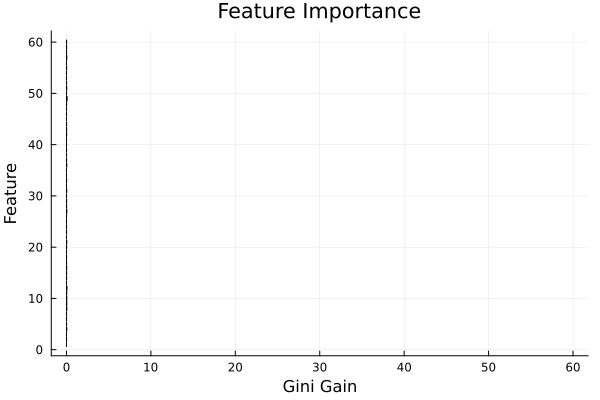

In [137]:
# Extract fitted model parameters
fitted_model = fitted_params(machines["RF"])

# Obtain feature importance values
# feature_importances = fitted_model.feature_importance

feature_importances = fitted_model.forest.featim

# Plot feature importance
p = bar(
    1:length(feature_importances),
    feature_importances,
    orientation = :horizontal,
    legend = false
)
xlabel!(p, "Gini Gain")
ylabel!(p, "Feature")
title!(p, "Feature Importance")

As shown in the plot, most of the predictive information may be concentrated in a small number of features.
Therefore, this metric can also be used for feature filtering or selection, which will be discussed in subsequent sections.

Random Forests represent one of the most robust and widely used ensemble methods.
They leverage bagging and feature randomness to build diverse trees, reducing variance and improving generalisation.
Moreover, they naturally provide interpretable measures such as feature importance, making them not only powerful predictors but also useful tools for exploratory data analysis.

### XGBoost (eXtreme Gradient Boosting)

Finally, in this last section, Gradient Boosting should be mentioned again, specifically an implementation that in recent years has become very famous for its versatility and speed. This implementation is known as ***XGBoost (eXtreme Gradient Boosting)*** , which has stood out especially in competitions such as the Kaggle platform for its speed in obtaining results and robustness. 

The ***XGBoost*** will be a similar ensemble to Random Forest but uses a different base classifier known as CART (classification and regression trees) instead of *Decision Trees*. This change comes from the need for the algorithm to obtain the probability of the decisions, as was the case with *Gradient Tree Boosting*. The other fundamental change in this algotimo, since it is based on *Gradient Tree Boosting*, is the change from *bagging* to *boosting* strategy for the creation of the classifier training sets.

Subsequently, this technique performs an additive training approach whose weights are adjusted based on a **Declining Gradient** on a *loss* function to be defined. By adding the *loss* function with the regularisation term, the second derivative of the functions can be calculated in order to update the classification weights of the different trees. The calculation of this gradient thus allows the adjustment of the values of the classifiers that are generated following a given one in order to allow the weights to focus attention on the patterns that are incorrectly classified. The mathematical details of the implementation can be found in this [link](https://xgboost.readthedocs.io/en/stable/tutorials/model.html).

Unlike the other approaches we have seen, the `xgboost` is not currently implemented in `scikit learn` but it is integrated in MLJ. However, the reference version must be installed if it is not already present on the machine which is the one used here.

In [138]:
using Pkg;
Pkg.add("XGBoost")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


After that installation, the library could be used as shown in the following example. Unlike other implementations, the Julia implementation supports Julia Array, SparseMatrixCSC, libSVM format text and XGBoost binary file as input.  Althouugh the vastly options given by Julia libraría in deep to change internaly to the format [LIBSVM](https://xgboost.readthedocs.io/en/stable/tutorials/input_format.html) as any other library. This library has not all the posibilities and, more especificl, the BitVector is not supported nowadays in their function `DMatrix`. So, an small change in the format is required in order to use the library. 

In [139]:
using XGBoost;

train_input = input_data
train_output = output_data

test_input = input_data
test_output = output_data

train_output_asNumber= Vector{Number}(train_output);

@assert train_output_asNumber isa Vector{Number}

Once this data adaptation is done, you can proceed with the training of a model from the `xgboost` library. To do so, it is only necessary to call the function train with the corresponding parameters. Among these parameters, the most important are:

- **eta**, term that will determine the compression of the weights after each new stage of *boosting*. It takes values between 0 and 1.
- **max_depth**, maximum depth of the trees has by default a value of 6, increasing it will allow more complex models.
- **gamma**, parameter that controls the minimum loss reduction necessary to perform a new partition on a leaf node of the tree. The higher it is, the more conservative it will be
- **alpha** and **lambda**, are the parameters that control the L1 and L2 regulation respectively.
- **objective**, sets the loss function to be used which can be one of the predefined ones, which can be consulted in this [link](https://xgboost.readthedocs.io/en/stable/parameter.html#parameters-for-tree-booster)

Further it is only necessary to set the maximum number of iterations of the boosting process as shown in the following example with 20 rounds.

In [140]:
svm_data = DMatrix(train_input, label=train_output_asNumber)

model = xgboost(svm_data, rounds=20, eta = 1, max_depth = 6)

[ Info: XGBoost: starting training.
┌ Warning: [19:22:41] WARNING: /workspace/srcdir/xgboost/src/learner.cc:740: 
│ Parameters: { "rounds" } are not used.
└ @ XGBoost ~/.julia/packages/XGBoost/5SES5/src/XGBoost.jl:34
[ Info: [1]	train-rmse:0.06685667952816027
[ Info: [2]	train-rmse:0.03784067051373981
[ Info: [3]	train-rmse:0.02057971291063566
[ Info: [4]	train-rmse:0.01269548720252575
[ Info: [5]	train-rmse:0.00709807877639992
[ Info: [6]	train-rmse:0.00428344147805759
[ Info: [7]	train-rmse:0.00305694459598080
[ Info: [8]	train-rmse:0.00142192344718740
[ Info: [9]	train-rmse:0.00098684141249462
[ Info: [10]	train-rmse:0.00068744187963404
[ Info: Training rounds complete.


Booster()

In the following piece of code, several parameters as passed as a dictionary and two different metrics are calculated. First, error refers to the incorrectly classified ones over the total amount, and the second one is the Area Under the Curve ROC (AUC).

### Question 7.5
> ❓ Which is the canonical name of the first measure that is been monitored?

Error rate

In [141]:
param = ["max_depth" => 2,
         "eta" => 1,
         "objective" => "binary:logistic"]
metrics = metrics = ["error", "auc"]
model = xgboost(DMatrix(train_input, label=train_output_asNumber), rounds=20, param=param, metrics=metrics)

pred = XGBoost.predict(model, train_input)

[ Info: XGBoost: starting training.
┌ Warning: [19:22:41] WARNING: /workspace/srcdir/xgboost/src/learner.cc:740: 
│ Parameters: { "metrics", "param", "rounds" } are not used.
└ @ XGBoost ~/.julia/packages/XGBoost/5SES5/src/XGBoost.jl:34
[ Info: [1]	train-rmse:0.36104272805218679
[ Info: [2]	train-rmse:0.26349314167054072
[ Info: [3]	train-rmse:0.19403141904608778
[ Info: [4]	train-rmse:0.14254849879038894
[ Info: [5]	train-rmse:0.10912439741860382
[ Info: [6]	train-rmse:0.08405248067916692
[ Info: [7]	train-rmse:0.06422803732657284
[ Info: [8]	train-rmse:0.05041922616002128
[ Info: [9]	train-rmse:0.04010784619540812
[ Info: [10]	train-rmse:0.03205229098624832
[ Info: Training rounds complete.


208-element Vector{Float32}:
 0.01804065
 0.031605005
 0.028208893
 0.01256614
 0.08909455
 0.016385488
 0.048917405
 0.073377535
 0.03411845
 0.014371509
 0.010147011
 0.02828527
 0.013967805
 ⋮
 0.9912259
 0.9912259
 0.9912259
 0.9773253
 0.9912259
 0.9912259
 1.0010829
 0.9912259
 0.9906951
 0.9912259
 0.9912259
 0.98940575

***Important***.

In case a validation set is used, this must be passed in the *evals* parameter of the training function. In addition, and only when the mentioned *evals* parameter is defined, you can set the rounds for the pre-stop with the *early_stopping_rounds* parameter of the training function. The code would be similar to:
``` julia
    evals = DMatrix(val_input, label=val_output)
    xgb_model = xgb.train(param, train_input, num_round,label = train_output_asNumber, evals=evals,
                    early_stopping_rounds=10)
```

The value provided in the output corresponds to the sum of the outputs of the trees, being between 0 and 1 for membership of a given class. Since this is a binary class, simply set a limit of 0.5 to the output to determine what the answer is.

In [142]:
using XGBoost: predict as predict_xgb

pred = predict_xgb(model, test_input)
print("Error of XGboost= ", sum((pred .> 0.5) .!= test_output) / float(size(pred)[1]), "\n")

Error of XGboost= 0.0


Finally, as in the case of the Random Forest it is possible to identify the importance and paint it for each of the variables in the ranking. With the following code it is possible to see such a marker ordered in a ascendent way

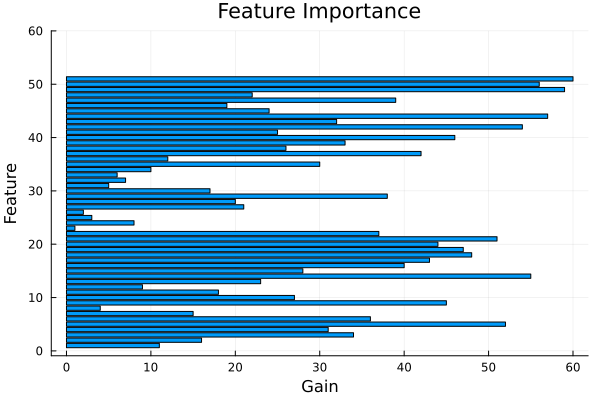

In [143]:
feature_gain =  [(first(x),last(x)) for x in importance(model)]
feature, gain = first.(feature_gain), last.(feature_gain)

using Plots;

p = bar(feature, y=gain, orientation="h", legend=false)
xlabel!(p,"Gain")
ylabel!(p,"Feature")
title!("Feature Importance")

As you can see, not all features has the same importance. It should be notice that the Feature axis identifies the position in the Vector  feature which is ordered by the gain value by default.

### Integration with MLJ

As mentioned previously, **XGBoost** can be seamlessly integrated into the **MLJ framework**, allowing it to be used consistently with other models, pipelines, and tuning workflows.  
This integration is provided through the [`MLJXGBoostInterface.jl`](https://github.com/JuliaAI/MLJXGBoostInterface.jl) package, which acts as a bridge between MLJ and the native XGBoost implementation.

To load the model, simply use the `@load` macro from MLJ:

```julia
# Load data and ensure correct scientific types
using DataFrames, MLJ

# Load XGBoost classifier
XGBoostClassifier = @load XGBoostClassifier pkg=XGBoost
```
Once loaded, the classifier can be configured, trained, and evaluated like any other MLJ model.

```julia
# Define model and parameters
xgb_model = XGBoostClassifier(
    num_round = 100,
    eta = 0.1, 
    max_depth = 6,
    objective = "multi:softprob"       # suitable for multi-class problems
)

# Bind model and data
mach = machine(xgb_model, X, y)

# Train the model
fit!(mach, verbosity = 1)

# Evaluate using cross-validation
cv_result = evaluate!(
    mach,
    resampling = CV(nfolds = 5, shuffle = true),
    measure = [accuracy, cross_entropy],
    verbosity = 0
)

cv_result.measurement

# ==============================
# Example of Tuning of the model
# ==============================

# Define a parameter range to explore
r_eta = range(xgb_model, :eta, lower=0.01, upper=0.3)
r_depth = range(xgb_model, :max_depth, lower=3, upper=10)

# Define tuning strategy
tuned_xgb = TunedModel(
    model = xgb_model,
    resampling = CV(nfolds=5, shuffle=true),
    range = [r_eta, r_depth],
    measure = accuracy,
    tuning = Grid(resolution=5),
    operation = predict_mode
)

# Train tuned model
mach_tuned = machine(tuned_xgb, X, y)
fit!(mach_tuned)

```

## Julia Notes

### Understanding `coerce` in MLJ

When working with datasets in MLJ, it’s important to understand that MLJ distinguishes between **machine types** (e.g., `Int64`, `Float64`, `String`) and **scientific types** (or `scitypes`), which describe how data should be *interpreted* for modeling.

### Why `coerce` is Needed

MLJ models don’t rely on the raw Julia types — instead, they expect variables to have *scientific meanings*:
- A numeric column can represent a **continuous** feature.
- A string column can represent a **categorical** feature.
- A boolean or integer can be **ordered** or **unordered**, depending on context.

Since Julia doesn’t know this automatically, we use the `coerce()` function to explicitly tell MLJ how to interpret each column.  
This ensures compatibility between your data and the MLJ model you plan to use.

---

### Example


In [144]:
using MLJ, DataFrames, CSV

# Load the dataset
data = CSV.read("sonar.all_data", DataFrame, header=false)

# Inspect current column types
schema(data)

# Suppose the last column is the target ('Rock' or 'Mine')
y, X = unpack(data, ==(:Column61), rng=123)

# Convert the target variable to categorical
y = coerce(y, Multiclass)

# Convert all feature columns to continuous
X = coerce(X, autotype(X, rules = (:discrete_to_continuous,)))

# Verify the new scientific types
schema(X)

┌──────────┬────────────┬─────────┐
│ names    │ scitypes   │ types   │
├──────────┼────────────┼─────────┤
│ Column1  │ Continuous │ Float64 │
│ Column2  │ Continuous │ Float64 │
│ Column3  │ Continuous │ Float64 │
│ Column4  │ Continuous │ Float64 │
│ Column5  │ Continuous │ Float64 │
│ Column6  │ Continuous │ Float64 │
│ Column7  │ Continuous │ Float64 │
│ Column8  │ Continuous │ Float64 │
│ Column9  │ Continuous │ Float64 │
│ Column10 │ Continuous │ Float64 │
│ Column11 │ Continuous │ Float64 │
│ Column12 │ Continuous │ Float64 │
│ Column13 │ Continuous │ Float64 │
│ Column14 │ Continuous │ Float64 │
│ Column15 │ Continuous │ Float64 │
│ Column16 │ Continuous │ Float64 │
│ Column17 │ Continuous │ Float64 │
│ Column18 │ Continuous │ Float64 │
│ Column19 │ Continuous │ Float64 │
│ Column20 │ Continuous │ Float64 │
│ Column21 │ Continuous │ Float64 │
│ Column22 │ Continuous │ Float64 │
│    ⋮     │     ⋮      │    ⋮    │
└──────────┴────────────┴─────────┘
                    38 rows 


### Common examples

| Situation                            | What to Do              | Example                              |
| ------------------------------------ | ----------------------- | ------------------------------------ |
| Categorical labels stored as strings | Convert to `Multiclass` | `y = coerce(y, Multiclass)`          |
| Numerical features                   | Convert to `Continuous` | `X = coerce(X, :var1 => Continuous)` |
| Automatic inference                  | Use `autotype()`        | `autotype(X)`                        |
| Check current scientific types       | Use `schema()`          | `schema(X)`                          |

### What Happens If You Skip coerce

If you skip the coercion step:

* MLJ might misinterpret your target as continuous, blocking classification models.
* Some algorithms (e.g., DecisionTree, NaiveBayes) may fail or produce wrong predictions.
* The machine() function might refuse to bind the model and data.

## Voting Classifier

Following this lines there are several examples of how to use the new Voting Classifier that we have implemented.

In previous examples, we created the ensemble as follows:

```julia
voting_hard = VotingClassifier(models=base_models_list, voting=:hard)
voting_soft = VotingClassifier(models=base_models_list, voting=:soft)

mach_hard = machine(voting_hard, train_input, train_output) |> fit!
mach_soft = machine(voting_soft, train_input, train_output) |> fit!
```

* `voting=:hard` → uses majority voting (based on class labels).

* `voting=:soft` → uses average probability voting (requires models that output probabilities).

The following examples show how to modify and integrate the VotingClassifier dynamically within your workflow.

In [145]:
base_models_list = base_models

# Example 1: Changing the Voting Type Dynamically
ensemble = VotingClassifier(models=base_models_list, voting=:hard)
println("\nCurrent voting type: $(ensemble.voting)")

ensemble.voting = :soft
println("Voting type changed to: $(ensemble.voting)")



Current voting type: hard
Voting type changed to: soft


In [146]:
using MLJBase
using MLJ # Added for the @pipeline macro

# Example 2: Using the VotingClassifier in a Pipeline
pipe_hard = @pipeline(
    Standardizer(),
    VotingClassifier(models=base_models_list, voting=:hard)
)

pipe_soft = @pipeline(
    Standardizer(),
    VotingClassifier(models=base_models_list, voting=:soft)
)

LoadError: LoadError: UndefVarError: `@pipeline` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
in expression starting at In[146]:5

In [ ]:
using MLJ

train_input_mlj = MLJ.table(train_input_standardized)
train_output_mlj = categorical(output_data[train_idx])

voting_hard = models["Ensemble (Hard Voting)"]
voting_soft = models["Ensemble (Soft Voting - Equal)"]

# Example 3: Cross-Validation Comparing Both Voting Strategies
# Use the restored MLJ data
cv_hard = evaluate!(
    machine(voting_hard, train_input_mlj, train_output_mlj),
    resampling=CV(nfolds=5),
    measure=MLJ.accuracy,
    check_measure=false
)
println("Hard Voting CV accuracy: $(round(mean(cv_hard.measurement)*100, digits=2)) %")

cv_soft = evaluate!(
    machine(voting_soft, train_input_mlj, train_output_mlj),
    resampling=CV(nfolds=5),
    measure=MLJ.accuracy,
    check_measure=false
)
println("Soft Voting CV accuracy: $(round(mean(cv_soft.measurement)*100, digits=2)) %")

Hard Voting CV accuracy: 75.94 %
Soft Voting CV accuracy: 75.94 %
